In [29]:
%pip install datapackage
import datapackage
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

data_url = 'https://datahub.io/machine-learning/covertype/datapackage.json'

# to load Data Package into storage
package = datapackage.Package(data_url)

# to load only tabular data
resources = package.resources
for resource in resources:
    if resource.tabular:
        data = pd.read_csv(resource.descriptor['path'])
        print (data)

        Elevation    Aspect     Slope  ...  Soil_Type39  Soil_Type40  class
0        0.368684  0.141667  0.045455  ...            0            0      5
1        0.365683  0.155556  0.030303  ...            0            0      5
2        0.472736  0.386111  0.136364  ...            0            0      2
3        0.463232  0.430556  0.272727  ...            0            0      2
4        0.368184  0.125000  0.030303  ...            0            0      5
...           ...       ...       ...  ...          ...          ...    ...
581007   0.268634  0.425000  0.303030  ...            0            0      3
581008   0.266133  0.422222  0.287879  ...            0            0      3
581009   0.263632  0.441667  0.257576  ...            0            0      3
581010   0.262631  0.472222  0.227273  ...            0            0      3
581011   0.262131  0.458333  0.196970  ...            0            0      3

[581012 rows x 55 columns]
        Elevation    Aspect     Slope  ...  Soil_Type39  Soi

In [30]:
data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,class
0,0.368684,0.141667,0.045455,0.184681,0.223514,0.071659,0.870079,0.913386,0.582677,0.875366,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,0.365683,0.155556,0.030303,0.151754,0.215762,0.054798,0.866142,0.925197,0.594488,0.867838,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,0.472736,0.386111,0.136364,0.191840,0.307494,0.446817,0.921260,0.937008,0.531496,0.853339,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,0.463232,0.430556,0.272727,0.173228,0.375969,0.434172,0.937008,0.937008,0.480315,0.865886,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,0.368184,0.125000,0.030303,0.109520,0.222222,0.054939,0.866142,0.921260,0.590551,0.860449,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [31]:
#--------------------------------


# row mean instance
# columns mean attributes
print(data.shape)
print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))
# willl print (instances , attributes)




(581012, 55)
Number of instances = 581012
Number of attributes = 55


In [32]:
#--------------------------------

# . For each class label, display the code of the class label and the
# name of that class.
print(data['class'].value_counts())





2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: class, dtype: int64


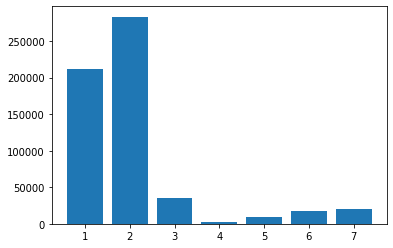

In [33]:
#--------------------------------

# Summarise the class distribution using a suitable graph.
cls = data['class'].astype('object').value_counts()

plt.bar(cls.index, cls)
plt.show()



In [34]:
#--------------------------------

# Display a statistical summary for all the attributes.
# for col in data.columns:

#     if is_numeric_dtype(data[col]):
#         print('%s:' % (col))
#         print('\t Mean = %.2f' % data[col].mean())
#         print('\t Standard deviation = %.2f' % data[col].std())
#         print('\t Minimum = %.2f' % data[col].min())
#         print('\t Maximum = %.2f' % data[col].max())

df = pd.DataFrame(data)
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,class
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,0.550458,0.432380,0.213693,0.192862,0.283487,0.330216,0.835221,0.879208,0.561135,0.276076,0.448865,0.051434,0.436074,0.063627,0.005217,0.012952,0.008301,0.021335,0.002749,0.011316,0.000181,0.000308,0.001974,0.056168,0.021359,0.051584,0.030001,0.001031,0.000005,0.004897,0.005890,0.003268,0.006921,0.015936,0.001442,0.057439,0.099399,0.036622,0.000816,0.004456,0.001869,0.001628,0.198356,0.051927,0.044175,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,0.140062,0.310871,0.113458,0.152147,0.075317,0.219089,0.105393,0.077830,0.150687,0.184608,0.497379,0.220882,0.495897,0.244087,0.072039,0.113066,0.090731,0.144499,0.052356,0.105775,0.013442,0.017550,0.044387,0.230245,0.144579,0.221186,0.170590,0.032092,0.002272,0.069804,0.076518,0.057077,0.082902,0.125228,0.037950,0.232681,0.299197,0.187833,0.028551,0.066605,0.043193,0.040318,0.398762,0.221879,0.205483,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.475238,0.161111,0.136364,0.077309,0.232558,0.155403,0.779528,0.838583,0.468504,0.142758,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.568784,0.352778,0.196970,0.156049,0.262274,0.280596,0.858268,0.889764,0.562992,0.238394,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

In [35]:
#--------------------------------

# Check whether the selected dataset has any data quality issues
# and choose suitable strategies to deal with any issue (if exists).
data = data.replace('?',np.NaN)

print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))

print('Number of missing values:')
for col in data.columns:
    print('\t%s: %d' % (col,data[col].isna().sum()))
# as we can see no data missing

# lets check duplicated data
dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))



Number of instances = 581012
Number of attributes = 55
Number of missing values:
	Elevation: 0
	Aspect: 0
	Slope: 0
	Horizontal_Distance_To_Hydrology: 0
	Vertical_Distance_To_Hydrology: 0
	Horizontal_Distance_To_Roadways: 0
	Hillshade_9am: 0
	Hillshade_Noon: 0
	Hillshade_3pm: 0
	Horizontal_Distance_To_Fire_Points: 0
	Wilderness_Area1: 0
	Wilderness_Area2: 0
	Wilderness_Area3: 0
	Wilderness_Area4: 0
	Soil_Type1: 0
	Soil_Type2: 0
	Soil_Type3: 0
	Soil_Type4: 0
	Soil_Type5: 0
	Soil_Type6: 0
	Soil_Type7: 0
	Soil_Type8: 0
	Soil_Type9: 0
	Soil_Type10: 0
	Soil_Type11: 0
	Soil_Type12: 0
	Soil_Type13: 0
	Soil_Type14: 0
	Soil_Type15: 0
	Soil_Type16: 0
	Soil_Type17: 0
	Soil_Type18: 0
	Soil_Type19: 0
	Soil_Type20: 0
	Soil_Type21: 0
	Soil_Type22: 0
	Soil_Type23: 0
	Soil_Type24: 0
	Soil_Type25: 0
	Soil_Type26: 0
	Soil_Type27: 0
	Soil_Type28: 0
	Soil_Type29: 0
	Soil_Type30: 0
	Soil_Type31: 0
	Soil_Type32: 0
	Soil_Type33: 0
	Soil_Type34: 0
	Soil_Type35: 0
	Soil_Type36: 0
	Soil_Type37: 0
	Soil_Type38: 0

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Elevation                           581012 non-null  float64
 1   Aspect                              581012 non-null  float64
 2   Slope                               581012 non-null  float64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  float64
 4   Vertical_Distance_To_Hydrology      581012 non-null  float64
 5   Horizontal_Distance_To_Roadways     581012 non-null  float64
 6   Hillshade_9am                       581012 non-null  float64
 7   Hillshade_Noon                      581012 non-null  float64
 8   Hillshade_3pm                       581012 non-null  float64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  float64
 10  Wilderness_Area1                    581012 non-null  int64  
 11  Wilderness_Area2          

In [37]:
#--------------------------------
#Convert the multiclass classification problem into a binary
#classification problem.
print('Before converting: \n',data['class'].value_counts() )
data['class'] = data['class'].replace([1,3,4,5,6,7],0)
data['class'] = data['class'].replace([2],1) # Class with highest count
print('After converting: \n',data['class'].value_counts() )



Before converting: 
 2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: class, dtype: int64
After converting: 
 0    297711
1    283301
Name: class, dtype: int64


[2.05824301e-01 5.30997471e-02 3.77648199e-02 6.62106227e-02
 6.11413466e-02 1.16624140e-01 4.34089115e-02 4.72540284e-02
 4.37193148e-02 1.06332995e-01 8.15060799e-03 4.62231231e-03
 8.80177664e-03 2.88805573e-02 6.88191980e-04 5.83323925e-03
 8.11963594e-04 5.90630369e-03 1.32287343e-04 1.31222978e-03
 7.79406525e-05 7.32141242e-05 4.88855153e-04 3.35747690e-03
 4.09853114e-03 2.60282834e-02 7.07104781e-03 2.86534746e-04
 9.60669844e-08 1.09472928e-03 1.13524981e-03 1.04826298e-03
 1.30021873e-03 2.60261186e-03 1.08728939e-03 1.44431732e-02
 9.65166738e-03 4.39292906e-03 4.52529664e-04 1.48583002e-03
 9.95776748e-04 7.20698292e-04 1.08476036e-02 5.32097284e-03
 3.85395702e-03 5.44895091e-03 4.70782484e-03 1.44910032e-03
 1.50511770e-03 7.33140312e-05 1.63516376e-04 1.62494326e-02
 1.44456435e-02 7.52192219e-03]


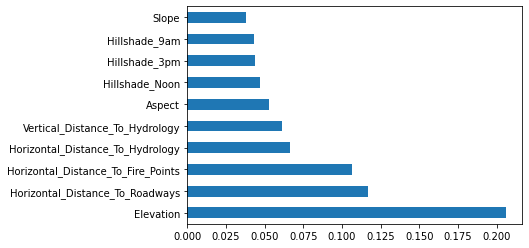

In [38]:
#Use a features selection technique to select those features in
#your data that contribute most to the prediction.
X = data.iloc[:,:-1]  #independent columns
y = data.iloc[:,-1]    #target column i.e class range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [39]:
feat_importances.nlargest(10).index

Index(['Elevation', 'Horizontal_Distance_To_Roadways',
       'Horizontal_Distance_To_Fire_Points',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Aspect', 'Hillshade_Noon', 'Hillshade_3pm', 'Hillshade_9am', 'Slope'],
      dtype='object')

***I used 10 of features for X***

---


In [40]:
#--------------------------------

### Use a features selection technique to select those features in
# your data that contribute most to the prediction
# Divide your dataset into training, validation and testing
# datasets.
X = data.drop(['class'],axis=1)[feat_importances.nlargest(10).index]
Y = data['class']
print('X shape after top 10 feature selection : ', X.shape)

X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2,random_state=0)
print("Number of instances in the training dataset = %d" % len(X_train))
print("Number of instances in the test dataset = %d" % len(X_test))
X_train, X_validation, Y_train, Y_validation = train_test_split( X_train, Y_train, test_size=0.3,random_state=0)
print("Number of instances in the training dataset = %d" % len(X_train))
print("Number of instances in the validation dataset = %d" % len(X_validation))
print("Number of instances in the test dataset = %d" % len(X_test))

X shape after top 10 feature selection :  (581012, 10)
Number of instances in the training dataset = 464809
Number of instances in the test dataset = 116203
Number of instances in the training dataset = 325366
Number of instances in the validation dataset = 139443
Number of instances in the test dataset = 116203


# Classification

In [41]:
tree_depth = list(range(1,20))
depth_training_acc_list =[]
depth_test_acc_list =[]
depth_validation_acc_list = []
dtc = []



```
 **DecisionTreeClassifier**```



In [42]:
for i in tree_depth:
    clf = DecisionTreeClassifier(max_depth = i ,  random_state = 0)
    clf.fit(X_train, Y_train)
    dtc.append(clf)


    predicted_Y_train = clf.predict(X_train)
    train_accuracy = accuracy_score(predicted_Y_train, Y_train)
    print("train_accuracy  ",train_accuracy)
   
    predicted_Y_validation = clf.predict(X_validation)
    validation_accuracy = accuracy_score(predicted_Y_validation, Y_validation)
    print("validation_accuracy  ",validation_accuracy)
    
    predicted_Y_test =clf.predict(X_test)
    test_accuracy = accuracy_score(predicted_Y_test, Y_test)
    print("test_accuracy",test_accuracy)
    print('#'*25)
    
    
    validation_result = [i,validation_accuracy]
    testing_result = [i,test_accuracy]
    train_result = [i,train_accuracy]
    depth_training_acc_list.append(train_result)
    depth_test_acc_list.append(testing_result)
    depth_validation_acc_list.append(validation_result)

train_accuracy   0.6684595194334995
validation_accuracy   0.6647734199637128
test_accuracy 0.6671256335894943
#########################
train_accuracy   0.7298642144538765
validation_accuracy   0.7265907933707679
test_accuracy 0.728767759868506
#########################
train_accuracy   0.7298642144538765
validation_accuracy   0.7265907933707679
test_accuracy 0.728767759868506
#########################
train_accuracy   0.7398068636550839
validation_accuracy   0.7387462977704151
test_accuracy 0.7383630370988701
#########################
train_accuracy   0.7459384201176521
validation_accuracy   0.7430061028520614
test_accuracy 0.7437587669853618
#########################
train_accuracy   0.7545103053177038
validation_accuracy   0.7520492244142768
test_accuracy 0.7529151570957721
#########################
train_accuracy   0.7693428323795357
validation_accuracy   0.765911519402193
test_accuracy 0.7671918969389775
#########################
train_accuracy   0.7763718397128158
validation_accu

In [43]:
i=0
while (i < len(depth_training_acc_list)):
    temp_list = depth_training_acc_list[i]
    tree_size = temp_list[0]
    training_acc = temp_list[1]
    
    temp_list = depth_test_acc_list[i]
    test_acc = temp_list[1]

    val_acc = depth_validation_acc_list[i][1]
    print("tree szie :%d \t training accuracy:%f \t validation accuracy:%f \t test accuracy:%f" % (tree_size, training_acc, val_acc, test_acc))
    i= i+1

tree szie :1 	 training accuracy:0.668460 	 validation accuracy:0.664773 	 test accuracy:0.667126
tree szie :2 	 training accuracy:0.729864 	 validation accuracy:0.726591 	 test accuracy:0.728768
tree szie :3 	 training accuracy:0.729864 	 validation accuracy:0.726591 	 test accuracy:0.728768
tree szie :4 	 training accuracy:0.739807 	 validation accuracy:0.738746 	 test accuracy:0.738363
tree szie :5 	 training accuracy:0.745938 	 validation accuracy:0.743006 	 test accuracy:0.743759
tree szie :6 	 training accuracy:0.754510 	 validation accuracy:0.752049 	 test accuracy:0.752915
tree szie :7 	 training accuracy:0.769343 	 validation accuracy:0.765912 	 test accuracy:0.767192
tree szie :8 	 training accuracy:0.776372 	 validation accuracy:0.771849 	 test accuracy:0.774782
tree szie :9 	 training accuracy:0.791435 	 validation accuracy:0.785066 	 test accuracy:0.786391
tree szie :10 	 training accuracy:0.802585 	 validation accuracy:0.794934 	 test accuracy:0.795900
tree szie :11 	 tra

In [44]:
# Selection of best model
clf = dtc[15] # treesize = 16
predicted_Y_train = clf.predict(X_train)
train_accuracy = accuracy_score(predicted_Y_train, Y_train)
print("train_accuracy  ",train_accuracy)

predicted_Y_validation = clf.predict(X_validation)
validation_accuracy = accuracy_score(predicted_Y_validation, Y_validation)
print("validation_accuracy  ",validation_accuracy)

predicted_Y_test =clf.predict(X_test)
test_accuracy = accuracy_score(predicted_Y_test, Y_test)
print("test_accuracy",test_accuracy)

train_accuracy   0.8933170644750834
validation_accuracy   0.8619005615197608
test_accuracy 0.863901964665284


In [45]:
print("confusion matrix for validation data set",'\n')

cm = confusion_matrix(Y_validation,predicted_Y_validation)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

#Classification accuracy
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('\n','Classification accuracy  for validation data set : {0:0.4f}'.format(classification_accuracy),'\n')

#Classification error
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('\n','Classification error  for validation data set : {0:0.4f}'.format(classification_error),'\n')


#Precision It is the ‘Exactness’, 
Precision = TP/(TP+FP) 
print('\n',"Precision for validation data set {:0.2f}".format(Precision),'\n')

#Recall It is the ‘Completeness’,

Recall = TP/(TP+FN) 
print('\n',"Recall for validation data set {:0.2f}".format(Recall),'\n')

#F-Measure Harmonic mean of Precision & Recall,
#used to indicate a balance between Precision & Recall providing each equal weightage

f1 = (2*Precision*Recall)/(Precision + Recall)
print("F-Measure for validation data set  {:0.2f}".format(f1))

print('\n',"confusion matrix for testing data set",'\n')


cm = confusion_matrix(Y_test,predicted_Y_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])
#Classification accuracy
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('\n','Classification accuracy for testing data set : {0:0.4f}'.format(classification_accuracy),'\n')

#Classification error
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('\n','Classification error  for testing data set : {0:0.4f}'.format(classification_error),'\n')

#Precision It is the ‘Exactness’, 
Precision = TP/(TP+FP) 
print('\n',"Precision for testing data set {:0.2f}".format(Precision),'\n')

#Recall It is the ‘Completeness’,

Recall = TP/(TP+FN) 
print('\n',"Recall for testing data set {:0.2f}".format(Recall),'\n')

#F-Measure Harmonic mean of Precision & Recall,
#used to indicate a balance between Precision & Recall providing each equal weightage

f1 = (2*Precision*Recall)/(Precision + Recall)
print("F-Measure for testing data set  {:0.2f}".format(f1))

confusion matrix for validation data set 

Confusion matrix

 [[59585 12256]
 [ 7001 60601]]

True Positives(TP) =  59585

True Negatives(TN) =  60601

False Positives(FP) =  12256

False Negatives(FN) =  7001

 Classification accuracy  for validation data set : 0.8619 


 Classification error  for validation data set : 0.1381 


 Precision for validation data set 0.83 


 Recall for validation data set 0.89 

F-Measure for validation data set  0.86

 confusion matrix for testing data set 

Confusion matrix

 [[49345 10009]
 [ 5806 51043]]

True Positives(TP) =  49345

True Negatives(TN) =  51043

False Positives(FP) =  10009

False Negatives(FN) =  5806

 Classification accuracy for testing data set : 0.8639 


 Classification error  for testing data set : 0.1361 


 Precision for testing data set 0.83 


 Recall for testing data set 0.89 

F-Measure for testing data set  0.86


In [46]:
# train a Gaussian Naive Bayes classifier 
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(X_train, Y_train)

predicted_Y_validation = gnb.predict(X_validation)

validation_accuracy = accuracy_score(predicted_Y_validation, Y_validation)
print("validation_accuracy  ",validation_accuracy)


predicted_Y_test =gnb.predict(X_test)
test_accuracy = accuracy_score(predicted_Y_test, Y_test)
print("test_accuracy",test_accuracy)
   
    


validation_accuracy   0.6533780828008577
test_accuracy 0.6555424558746332


In [47]:
print("confusion matrix for validation data set",'\n')

cm = confusion_matrix(Y_validation,predicted_Y_validation)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])
#Classification accuracy
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('\n','Classification accuracy  for validation data set : {0:0.4f}'.format(classification_accuracy),'\n')
#Classification error
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('\n','Classification error  for validation data set : {0:0.4f}'.format(classification_error),'\n')

#Precision It is the ‘Exactness’, 
Precision = TP/(TP+FP) 
print('\n',"Precision for validation data set {:0.2f}".format(Precision),'\n')

#Recall It is the ‘Completeness’,

Recall = TP/(TP+FN) 
print('\n',"Recall for validation data set {:0.2f}".format(Recall),'\n')

#F-Measure Harmonic mean of Precision & Recall,
#used to indicate a balance between Precision & Recall providing each equal weightage

f1 = (2*Precision*Recall)/(Precision + Recall)
print("F-Measure for validation data set  {:0.2f}".format(f1))


print('\n',"confusion matrix for testing data set",'\n')

cm = confusion_matrix(Y_test,predicted_Y_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])
#Classification accuracy
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('\n','Classification accuracy for testing data set : {0:0.4f}'.format(classification_accuracy),'\n')
#Classification error
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('\n','Classification error  for testing data set : {0:0.4f}'.format(classification_error),'\n')

#Precision It is the ‘Exactness’, 
Precision = TP/(TP+FP) 
print('\n',"Precision for testing data set {:0.2f}".format(Precision),'\n')

#Recall It is the ‘Completeness’,

Recall = TP/(TP+FN) 
print('\n',"Recall for testing data set {:0.2f}".format(Recall),'\n')

#F-Measure Harmonic mean of Precision & Recall,
#used to indicate a balance between Precision & Recall providing each equal weightage

f1 = (2*Precision*Recall)/(Precision + Recall)
print("F-Measure for testing data set  {:0.2f}".format(f1))

confusion matrix for validation data set 

Confusion matrix

 [[43990 27851]
 [20483 47119]]

True Positives(TP) =  43990

True Negatives(TN) =  47119

False Positives(FP) =  27851

False Negatives(FN) =  20483

 Classification accuracy  for validation data set : 0.6534 


 Classification error  for validation data set : 0.3466 


 Precision for validation data set 0.61 


 Recall for validation data set 0.68 

F-Measure for validation data set  0.65

 confusion matrix for testing data set 

Confusion matrix

 [[36504 22850]
 [17177 39672]]

True Positives(TP) =  36504

True Negatives(TN) =  39672

False Positives(FP) =  22850

False Negatives(FN) =  17177

 Classification accuracy for testing data set : 0.6555 


 Classification error  for testing data set : 0.3445 


 Precision for testing data set 0.62 


 Recall for testing data set 0.68 

F-Measure for testing data set  0.65


In [48]:
from sklearn.ensemble import RandomForestClassifier
tree_num = list(range(1,10))
depth_traing_acc_list =[]
depth_test_acc_list =[]
depth_validation_acc_list = []
rfc = []



print("Number of instances in the training dataset = %d" % len(X_train))
print("Number of instances in the test dataset = %d" % len(X_test))

print("Number of instances in the training dataset = %d" % len(X_train))
print("Number of instances in the validation dataset = %d" % len(X_validation))
print("Number of instances in the test dataset = %d" % len(X_test))
for i in tree_num:
    print('Number of estimators used: ', 10+i*3)
    # train a Random Forest Classifier 
    # n_estimator means that this number of decision tress would be trained to ensemble into a random forest
    clf2 = RandomForestClassifier( random_state=0, n_estimators = 10+ i*3)
    clf2.fit(X_train, Y_train)
    rfc.append(clf2)

    predicted_Y_train = clf2.predict(X_train)
    train_accuracy = accuracy_score(predicted_Y_train, Y_train)
    print("train_accuracy  ",train_accuracy)
   
    predicted_Y_validation = clf2.predict(X_validation)
    validation_accuracy = accuracy_score(predicted_Y_validation, Y_validation)
    print("validation_accuracy  ",validation_accuracy)
    
    predicted_Y_test =clf2.predict(X_test)
    test_accuracy = accuracy_score(predicted_Y_test, Y_test)
    print("test_accuracy",test_accuracy)
    print('#'*25)
    
    
    validation_result = [i,validation_accuracy]
    testing_result = [i,test_accuracy]
    train_result = [i,train_accuracy]
    depth_training_acc_list.append(train_result)
    depth_test_acc_list.append(testing_result)
    depth_validation_acc_list.append(validation_result)

    ###################
    

Number of instances in the training dataset = 325366
Number of instances in the test dataset = 116203
Number of instances in the training dataset = 325366
Number of instances in the validation dataset = 139443
Number of instances in the test dataset = 116203
Number of estimators used:  13
train_accuracy   0.9988781864116103
validation_accuracy   0.9370782326828884
test_accuracy 0.9380480710480796
#########################
Number of estimators used:  16
train_accuracy   0.9993576464658261
validation_accuracy   0.9391292499444217
test_accuracy 0.9400101546431675
#########################
Number of estimators used:  19
train_accuracy   0.9995482011027581
validation_accuracy   0.9405133280265054
test_accuracy 0.9416538299355438
#########################
Number of estimators used:  22
train_accuracy   0.9996465518831101
validation_accuracy   0.9414384372109034
test_accuracy 0.9434954347133895
#########################
Number of estimators used:  25
train_accuracy   0.9997787107442081
valida

In [49]:
clf2 = rfc[1] # As overfitting is least
predicted_Y_train = clf2.predict(X_train)
train_accuracy = accuracy_score(predicted_Y_train, Y_train)
print("train_accuracy  ",train_accuracy)

predicted_Y_validation = clf2.predict(X_validation)
validation_accuracy = accuracy_score(predicted_Y_validation, Y_validation)
print("validation_accuracy  ",validation_accuracy)

predicted_Y_test =clf2.predict(X_test)
test_accuracy = accuracy_score(predicted_Y_test, Y_test)
print("test_accuracy",test_accuracy)

train_accuracy   0.9993576464658261
validation_accuracy   0.9391292499444217
test_accuracy 0.9400101546431675


In [50]:
print("confusion matrix for validation data set",'\n')

cm = confusion_matrix(Y_validation,predicted_Y_validation)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])
#Classification accuracy
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('\n','Classification accuracy  for validation data set : {0:0.4f}'.format(classification_accuracy),'\n')
#Classification error
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('\n','Classification error  for validation data set : {0:0.4f}'.format(classification_error),'\n')

#Precision It is the ‘Exactness’, 
Precision = TP/(TP+FP) 
print('\n',"Precision for validation data set {:0.2f}".format(Precision),'\n')

#Recall It is the ‘Completeness’,

Recall = TP/(TP+FN) 
print('\n',"Recall for validation data set {:0.2f}".format(Recall),'\n')

#F-Measure Harmonic mean of Precision & Recall,
#used to indicate a balance between Precision & Recall providing each equal weightage

f1 = (2*Precision*Recall)/(Precision + Recall)
print("F-Measure for validation data set  {:0.2f}".format(f1))


print('\n',"confusion matrix for testing data set",'\n')

cm = confusion_matrix(Y_test,predicted_Y_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])
#Classification accuracy
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('\n','Classification accuracy for testing data set : {0:0.4f}'.format(classification_accuracy),'\n')
#Classification error
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('\n','Classification error  for testing data set : {0:0.4f}'.format(classification_error),'\n')

#Precision It is the ‘Exactness’, 
Precision = TP/(TP+FP) 
print('\n',"Precision for testing data set {:0.2f}".format(Precision),'\n')

#Recall It is the ‘Completeness’,

Recall = TP/(TP+FN) 
print('\n',"Recall for testing data set {:0.2f}".format(Recall),'\n')

#F-Measure Harmonic mean of Precision & Recall,
#used to indicate a balance between Precision & Recall providing each equal weightage

f1 = (2*Precision*Recall)/(Precision + Recall)
print("F-Measure for testing data set  {:0.2f}".format(f1))

confusion matrix for validation data set 

Confusion matrix

 [[67599  4242]
 [ 4246 63356]]

True Positives(TP) =  67599

True Negatives(TN) =  63356

False Positives(FP) =  4242

False Negatives(FN) =  4246

 Classification accuracy  for validation data set : 0.9391 


 Classification error  for validation data set : 0.0609 


 Precision for validation data set 0.94 


 Recall for validation data set 0.94 

F-Measure for validation data set  0.94

 confusion matrix for testing data set 

Confusion matrix

 [[55882  3472]
 [ 3499 53350]]

True Positives(TP) =  55882

True Negatives(TN) =  53350

False Positives(FP) =  3472

False Negatives(FN) =  3499

 Classification accuracy for testing data set : 0.9400 


 Classification error  for testing data set : 0.0600 


 Precision for testing data set 0.94 


 Recall for testing data set 0.94 

F-Measure for testing data set  0.94


In [51]:
# Applying 10-Fold Cross Validation

from sklearn.model_selection import cross_val_score
# cv = Data is divided into k number of dubsets for comparison
scores = cross_val_score(gnb, X_train, Y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores for gnp :{}'.format(scores.mean()))

scores2 = cross_val_score(clf, X_train, Y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores for clf :{}'.format(scores2.mean()))

scores3 = cross_val_score(clf2, X_train, Y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores for clf2 :{}'.format(scores3.mean()))




Cross-validation scores for gnp :0.6546904025481888
Cross-validation scores for clf :0.8589434644696798
Cross-validation scores for clf2 :0.9334349606946521


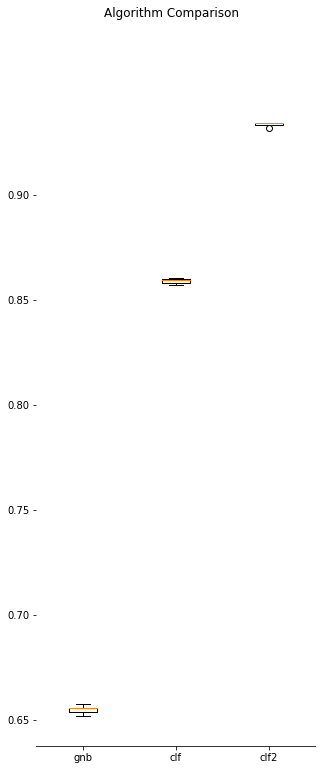

In [52]:
results = []
names = []
results.append(scores)
names.append('gnb')
results.append(scores2)
names.append('clf')
results.append(scores3)
names.append('clf2')
# boxplot algorithm comparison
fig = plt.figure(figsize=(5,12))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)

# Remove top and right border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.show()

Naïve Bayes
0.6546904025481888


Text(0.5, 1.0, 'My comparison')

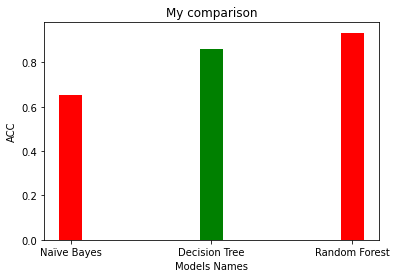

In [73]:
print(names[0])
print(scores.mean())
left = [5, 10, 15]
 
# heights of bars
height = [scores.mean(), scores2.mean(), scores3.mean()]
names = ['Naïve Bayes','Decision Tree','Random Forest']
plt.bar(left, height, tick_label = names,
        width = 0.8, color = ['red', 'green'])
# naming the x-axis
plt.xlabel('Models Names')
# naming the y-axis
plt.ylabel('ACC')
# plot title
plt.title('My comparison')